# Introduction
                Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time .Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.Our task is to develop an automated system which would classify the images into the different categories.

### Importing os package

In [1]:
import os
print(os.listdir())

['Retina_OCT_Image_analysis.ipynb', '.ipynb_checkpoints', 'OCT2017 ']


In [2]:
from os import listdir

In [3]:
listdir('OCT2017 ')

['NORMAL', 'CNV', '.ipynb_checkpoints', 'DRUSEN', 'DME']

### Summary 
        *. Displaying all the list of files in the directory.

In [4]:
data = 'OCT2017 '

In [5]:
listdir(data)

['NORMAL', 'CNV', '.ipynb_checkpoints', 'DRUSEN', 'DME']

### Summary
               * We are taking only 1000 images but of my ram constraint.

### Importing all the necessary packages

In [6]:
import pandas as pd
import numpy as np
import os
from os import listdir
from glob import glob
import itertools
import fnmatch
import random
from PIL import Image
import zlib
import itertools
import fnmatch
import random
from PIL import Image
import zlib
import itertools
import csv
from tqdm import tqdm
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import skimage
from skimage import transform
from skimage.transform import resize
import scipy
from scipy.misc import imresize, imread
from scipy import misc
import keras
from keras import backend as K
from keras import models, layers, optimizers
from keras.applications.inception_v3 import InceptionV3
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model, Sequential, model_from_json
from keras.layers import Dense, Dropout, Input, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Lambda, AveragePooling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.utils import class_weight
%matplotlib inline

Using TensorFlow backend.


In [7]:
listdir(data+'/'+'NORMAL')[0:10]

['NORMAL-330905-1.jpeg',
 'NORMAL-628048-1.jpeg',
 'NORMAL-3465750-1.jpeg',
 'NORMAL-101880-1.jpeg',
 'NORMAL-1998191-1.jpeg',
 'NORMAL-2182640-1.jpeg',
 'NORMAL-3077276-1.jpeg',
 'NORMAL-460711-1.jpeg',
 'NORMAL-12494-2.jpeg',
 'NORMAL-3256489-1.jpeg']

In [8]:
listdir(data+'/'+'CNV')[0:10]

['CNV-1188386-1.jpeg',
 'CNV-103044-12.jpeg',
 'CNV-2158821-2.jpeg',
 'CNV-3163547-1.jpeg',
 'CNV-1997439-7.jpeg',
 'CNV-4674526-1.jpeg',
 'CNV-457907-1.jpeg',
 'CNV-163081-5.jpeg',
 'CNV-1699976-2.jpeg',
 'CNV-1699976-4.jpeg']

In [9]:
listdir(data+'/'+'DME')[0:10]

['DME-4634094-1.jpeg',
 'DME-5864085-1.jpeg',
 'DME-3921035-1.jpeg',
 'DME-6314020-1.jpeg',
 'DME-57603-1.jpeg',
 'DME-7614088-1.jpeg',
 'DME-8177380-1.jpeg',
 'DME-7591008-1.jpeg',
 'DME-1274315-2.jpeg',
 'DME-7469235-1.jpeg']

In [10]:
listdir(data+'/'+'DRUSEN')[0:10]

['DRUSEN-95633-1.jpeg',
 'DRUSEN-1912508-1.jpeg',
 'DRUSEN-4240777-1.jpeg',
 'DRUSEN-7393104-1.jpeg',
 'DRUSEN-9624303-1.jpeg',
 'DRUSEN-7915033-1.jpeg',
 'DRUSEN-4878077-5.jpeg',
 'DRUSEN-2541184-1.jpeg',
 'DRUSEN-3241692-1.jpeg',
 'DRUSEN-6193297-1.jpeg']

In [11]:
### source : kaggle
imageSize=256 # choosing imagesize=256
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            #labelling each folders 
            if folderName in ['NORMAL']: 
                label = 0
            elif folderName in ['CNV']:
                label = 1
            elif folderName in ['DME']:
                label = 2
            elif folderName in ['DRUSEN']:
                label = 3
            else:
                label = 4
            for image_filename in tqdm(os.listdir(folder+'/'+folderName)):
                img_file = cv2.imread(folder+'/' + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

X_test, y_test= get_data(data)

from sklearn.model_selection import train_test_split #train,test split
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2) 

  0%|          | 0/242 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 242/242 [00:05<00:00, 47.50it/s]


### Summary
            *. Loading the data from all the folders.
            *. Labelling each folder to different values 0,1,2,3 .
            *. Taking this labelled values as targeted values.

In [12]:
X_train.shape

(774, 256, 256, 3)

In [13]:
y_test[:10]

array([0, 3, 2, 2, 0, 1, 1, 1, 3, 3])

In [14]:
X_train[0]

array([[[0.12414216, 0.12414216, 0.12414216],
        [0.11685049, 0.11685049, 0.11685049],
        [0.11384804, 0.11384804, 0.11384804],
        ...,
        [0.98400735, 0.98400735, 0.98400735],
        [0.99375   , 0.99375   , 0.99375   ],
        [0.99344363, 0.99344363, 0.99344363]],

       [[0.09136029, 0.09136029, 0.09136029],
        [0.11691176, 0.11691176, 0.11691176],
        [0.10784314, 0.10784314, 0.10784314],
        ...,
        [0.61819853, 0.61819853, 0.61819853],
        [0.99601716, 0.99601716, 0.99601716],
        [0.98480392, 0.98480392, 0.98480392]],

       [[0.10202206, 0.10202206, 0.10202206],
        [0.13333333, 0.13333333, 0.13333333],
        [0.11378676, 0.11378676, 0.11378676],
        ...,
        [0.06452206, 0.06452206, 0.06452206],
        [0.03572304, 0.03572304, 0.03572304],
        [0.50514706, 0.50514706, 0.50514706]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

### Converting all the y values to categorical values

In [15]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [16]:
y_test[0]

array([1., 0., 0., 0.], dtype=float32)

### Summary
            *. Converting all numeric y values to categorical values

### Data Augmentation

In [21]:
#source :Kaggle
datagenerated = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [27]:
datagenerated

### Summary

        We are using data augmentation, to generate different images with different rotation angles and flips.

### Baseline model with 2 layer architecture

In [28]:
input_shape=(imageSize, imageSize, 3)

In [35]:
batch_size = 16
num_classes = 4
epochs = 12

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,strides=1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [37]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit_generator(datagenerated.flow(X_train,y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data = [X_test,y_test])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
49/48 [==============================] - 93s 2s/step - loss: 3.3830 - acc: 0.2772 - val_loss: 1.3351 - val_acc: 0.2887
Epoch 2/12
49/48 [==============================] - 86s 2s/step - loss: 1.3751 - acc: 0.3474 - val_loss: 1.3263 - val_acc: 0.3557
Epoch 3/12
49/48 [==============================] - 85s 2s/step - loss: 1.3483 - acc: 0.3295 - val_loss: 1.3016 - val_acc: 0.3557
Epoch 4/12
49/48 [==============================] - 86s 2s/step - loss: 1.3458 - acc: 0.3580 - val_loss: 1.3165 - val_acc: 0.3660
Epoch 5/12
49/48 [==============================] - 88s 2s/step - loss: 1.3339 - acc: 0.3555 - val_loss: 1.3295 - val_acc: 0.3608
Epoch 6/12
49/48 [==============================] - 87s 2s/step - loss: 1.2968 - acc: 0.3691 - val_loss: 1.1925 - val_acc: 0.4072
Epoch 7/12
49/48 [==============================] - 87s 2s/step - loss: 1.2610 - acc: 0.4026 - val_loss: 1.1400 - val_acc: 0.4794
Epoch 8/12
49/48 [==============================] - 86s 2s/step - loss: 1.2460 - acc: 0.39

### Plot between train loss and test loss

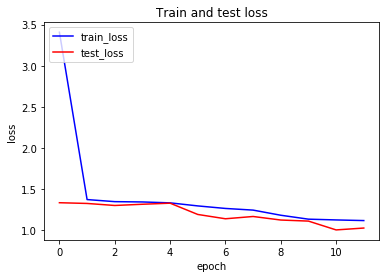

In [38]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="red")
plt.title('Train and test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

### Summary
            *. Training the model with only 2 layer architecture.
            *. Test accuracy is only 54 %
            *. From the graph, we can conclude, model is overfitting .

### Baseline model with 7 layer architecture

In [39]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5, 5),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (2,2),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [40]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit_generator(datagenerated.flow(X_train,y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data = [X_test,y_test])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
49/48 [==============================] - 209s 4s/step - loss: 11.5066 - acc: 0.2458 - val_loss: 11.6899 - val_acc: 0.2680
Epoch 2/12
49/48 [==============================] - 199s 4s/step - loss: 11.1105 - acc: 0.2861 - val_loss: 11.2133 - val_acc: 0.2990
Epoch 3/12
49/48 [==============================] - 204s 4s/step - loss: 11.5646 - acc: 0.2615 - val_loss: 12.4778 - val_acc: 0.2216
Epoch 4/12
49/48 [==============================] - 199s 4s/step - loss: 11.6186 - acc: 0.2640 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 5/12
49/48 [==============================] - 201s 4s/step - loss: 11.7090 - acc: 0.2593 - val_loss: 12.1175 - val_acc: 0.2474
Epoch 6/12
49/48 [==============================] - 201s 4s/step - loss: 11.6707 - acc: 0.2593 - val_loss: 11.7350 - val_acc: 0.2629
Epoch 7/12
49/48 [==============================] - 198s 4s/step - loss: 10.8986 - acc: 0.3061 - val_loss: 11.4654 - val_acc: 0.2887
Epoch 8/12
49/48 [==============================] - 197s 4s/step - lo

### Plot between train loss and test loss

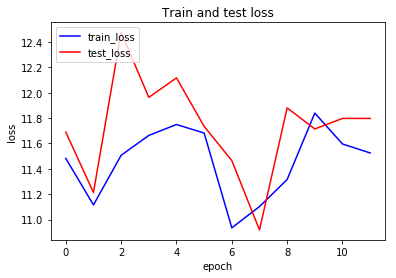

In [41]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="red")
plt.title('Train and test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

### Summary
            *. Training the model with only 7 layer architecture.
            *. Test accuracy is only 26 %
            *. The model is performing worse with 7 layer architecture .

# Using transfer learning methods

### Using Inception v3

In [42]:
from keras.applications import inception_v3
pretrained_model_incp = InceptionV3(include_top=False, input_shape=(imageSize, imageSize, 3))

In [43]:
base_model = pretrained_model_incp
opt = keras.optimizers.Adam()
x = base_model.output
x = Conv2D(256, kernel_size = (3,3), padding = 'valid')(x)
x = Flatten()(x)
x = Dropout(0.75)(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Train top layer
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 127, 127, 32) 96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 127, 127, 32) 0           batch_normalization_8[0][0]      
__________________________________________________________________________________________________
conv2d_17 

In [45]:
history = model.fit_generator(datagenerated.flow(X_train,y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data = [X_test,y_test])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
49/48 [==============================] - 104s 2s/step - loss: 10.9795 - acc: 0.3014 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 2/12
49/48 [==============================] - 103s 2s/step - loss: 12.1362 - acc: 0.2470 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 3/12
49/48 [==============================] - 97s 2s/step - loss: 12.0690 - acc: 0.2512 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 4/12
49/48 [==============================] - 97s 2s/step - loss: 12.1698 - acc: 0.2450 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 5/12
49/48 [==============================] - 97s 2s/step - loss: 12.0690 - acc: 0.2512 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 6/12
49/48 [==============================] - 101s 2s/step - loss: 12.1362 - acc: 0.2470 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 7/12
49/48 [==============================] - 98s 2s/step - loss: 12.1026 - acc: 0.2491 - val_loss: 11.9639 - val_acc: 0.2577
Epoch 8/12
49/48 [==============================] - 88s 2s/step - loss: 1

### Plot between train loss and test loss

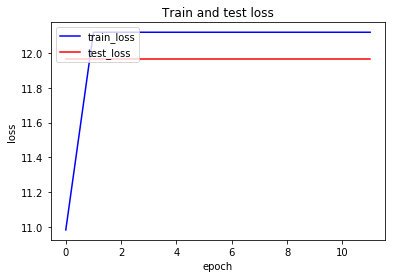

In [46]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="red")
plt.title('Train and test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

### Summary
            *. Training the model with pretrained inception v3 model.
            *. Test accuracy is only 45 %
            *. The model is overfitting.

### Using Resnet

In [47]:
from keras.applications import vgg16, inception_v3, ResNet50
pretrained_model_res = ResNet50(include_top=False, input_shape=(imageSize, imageSize, 3))

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [48]:
base_model = pretrained_model_res 
opt = keras.optimizers.Adam()
x = base_model.output
x = Conv2D(256, kernel_size = (3,3), padding = 'valid')(x)
x = Flatten()(x)
x = Dropout(0.75)(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Train top layer
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [49]:
history = model.fit_generator(datagenerated.flow(X_train,y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data = [X_test,y_test])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
49/48 [==============================] - 168s 3s/step - loss: 12.0201 - acc: 0.2317 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 2/12
49/48 [==============================] - 160s 3s/step - loss: 12.0128 - acc: 0.2547 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 3/12
49/48 [==============================] - 163s 3s/step - loss: 11.9792 - acc: 0.2568 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 4/12
49/48 [==============================] - 161s 3s/step - loss: 12.0464 - acc: 0.2526 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 5/12
49/48 [==============================] - 162s 3s/step - loss: 11.9792 - acc: 0.2568 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 6/12
49/48 [==============================] - 160s 3s/step - loss: 11.9121 - acc: 0.2609 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 7/12
49/48 [==============================] - 160s 3s/step - loss: 11.9457 - acc: 0.2589 - val_loss: 12.4624 - val_acc: 0.2268
Epoch 8/12
49/48 [==============================] - 160s 3s/step - lo

### Plot between train loss and test loss

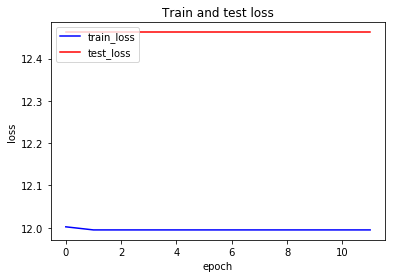

In [50]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="red")
plt.title('Train and test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

### Summary
            *. Training the model with pretrained resnet model.
            *. Test accuracy is only 22 %
            *. The model is performing worse than any other models .

### Using VGG16

In [51]:
pretrained_model_vgg = VGG16(include_top=False, input_shape=(imageSize, imageSize, 3))

In [52]:
base_model = pretrained_model_vgg
opt = keras.optimizers.Adam()
x = base_model.output
x = Conv2D(256, kernel_size = (3,3), padding = 'valid')(x)
x = Flatten()(x)
x = Dropout(0.75)(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Train top layer
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [53]:
history = model.fit_generator(datagenerated.flow(X_train,y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data = [X_test,y_test])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
49/48 [==============================] - 158s 3s/step - loss: 3.3151 - acc: 0.4396 - val_loss: 1.2139 - val_acc: 0.7113
Epoch 2/12
49/48 [==============================] - 152s 3s/step - loss: 1.3570 - acc: 0.7088 - val_loss: 0.4765 - val_acc: 0.8814
Epoch 3/12
49/48 [==============================] - 154s 3s/step - loss: 1.3842 - acc: 0.7530 - val_loss: 1.1874 - val_acc: 0.7938
Epoch 4/12
49/48 [==============================] - 153s 3s/step - loss: 1.7091 - acc: 0.7359 - val_loss: 3.0028 - val_acc: 0.7113
Epoch 5/12
49/48 [==============================] - 157s 3s/step - loss: 1.2917 - acc: 0.8201 - val_loss: 0.6463 - val_acc: 0.8660
Epoch 6/12
49/48 [==============================] - 156s 3s/step - loss: 1.8357 - acc: 0.7840 - val_loss: 1.3471 - val_acc: 0.8454
Epoch 7/12
49/48 [==============================] - 154s 3s/step - loss: 1.4244 - acc: 0.8252 - val_loss: 1.1315 - val_acc: 0.8660
Epoch 8/12
49/48 [==============================] - 157s 3s/step - loss: 1.4948 - a

### Plot between train loss and test loss

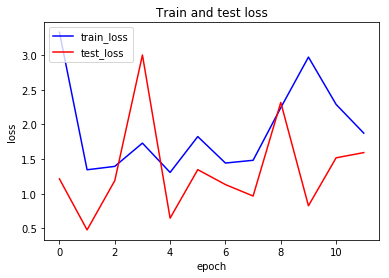

In [54]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="red")
plt.title('Train and test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

### Summary
            *. Training the model with pretrained VGG16 model.
            *. Test accuracy is only 87 %
            *. The model is performing better than other baseline and other transfer learning models .

# Table
                ------------------------------------------------------------------------
                |         Model           |      Test loss      |     Test accuracy    |
                ------------------------------------------------------------------------
                |    2 layer              |        1.02         |           0.54       |
                |         architecture    |                     |                      |
                ------------------------------------------------------------------------
                |     3 layer             |        11.79        |           0.26       |
                |        architecture     |                     |                      |
                ------------------------------------------------------------------------
                |      Inception v3       |        11.96        |           0.25       |
                ------------------------------------------------------------------------
                |      ResNet             |        12.46        |           0.22       |
                ------------------------------------------------------------------------
                |       VGG               |        1.59         |           0.87       |
                ------------------------------------------------------------------------

### Summary
            *. VGG16 model is performing better than all the other model
            *. With VGG16, we have an accuracy of 87 %

### Conclusion
                *. Loading the data
                *. Labelling the data, and taking the labelled value as target value
                *. Converting all the y values to categorical values.
                *. We are augmenting the images
                *. Training the model with basline, trying with different architecture.
                *. Applying transfer learning methodology to train the model.
                *. With VGG16, we are getting better accuracy than other models.